# **People Analytics.**

Introduccion (oreillys).

## Predecir la probabilidad de que un candidato busque un nuevo trabajo.

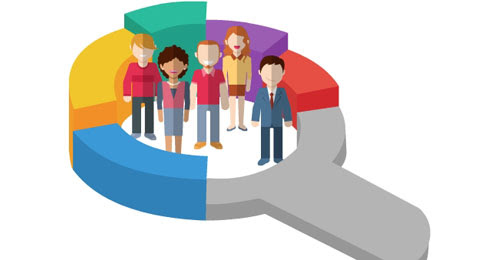

Una empresa activa en Big Data y Data Science quiere contratar científicos de datos entre las personas que superan con éxito algunos cursos que imparte la empresa. Mucha gente se apunta a su formación. La empresa quiere saber cuáles de estos candidatos realmente quieren trabajar para la empresa después de la formación o buscaran un nuevo empleo porque ésto ayuda a reducir  costes y  tiempo, así como la calidad de la formación o la planificación de los cursos y la categorización de los candidatos. La información relacionada con la demografía, la educación y la experiencia está en manos de Recursos Humanos y la inscripción de los candidatos.

Este conjunto de datos está diseñado para comprender los factores que llevan a una persona a dejar su trabajo actual para dedicarse también a investigaciones de recursos humanos. Por modelo (s) que utiliza las credenciales actuales, datos demográficos y datos de experiencia, podrá predecir la probabilidad de que un candidato busque un nuevo trabajo o trabaje para la empresa, además de interpretar los factores afectados en la decisión del empleado.

* Nos encontramos ante un problema de Clasificación.
* Desafios de este Conjunto de datos :
  * El conjunto de datos está desequilibrado.
  * La mayoría de las características son categóricas (nominal, ordinal, binaria).
  * La imputación faltante.

**Objetivo**

Predecir la probabilidad de que un candidato trabaje para la empresa, despues de la formación o busque un nuevo trabajo.
Interpretar el (los) modelo (s) de tal manera que ilustre qué características afectan la decisión del candidato
Consulte la siguiente tarea para obtener más detalles:
https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists/tasks?taskId=3015.


**Objetivo: probabilidad de que un afiliado busque un cambio de trabajo**

 target:

  0 – Not looking for job change,
  
  1 – Looking for a job change. ABANDONO.



<a name="init"></a>
<h1> MI TFM</h1>


<dl>
  <dt><a href="#carga_datos">1. Importación de librerias y Carga de datos</a></dt>
      <dd>Breve Introducción del dataset</dd>
    
  <dt><a href="#target">2. Target</a></
  </dt>
      <dd>Problema Machine Learning: Clasificación. Datos desbalanceados</dd>
    
  <dt><a href="#split_train_test">3. Detección de anomalías</a></dt>
      <dd>Missings. Duplicados. Eliminación de features. Outliers</dd>
    
  <dt><a href="#analisis">4. Análisis y limpieza de los datos</a></dt>
      <dd>Tratamiento de los missings. Análisis de las univariables y de las bivariables.</dd>
    
  <dt><a href="#ML">5. PCA </a></dt>
      <dd>Análisis de componentes principales </dd>


</dl>

<a name="carga_datos"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 1. Importación de librerias y Carga de datos.
Breve Introducción del dataset.

<img src="./img/ml_types.png" alt="drawing" width="650"/>



In [1]:
# Importamos Librerias.

# data analysis and wrangling
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
!pip install mglearn

In [139]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [4]:
!pip install dash

In [5]:
import mglearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import os # unir rutas
import glob # "cotillear" carpetas
import plotly.express as px
import plotly.graph_objects as go
### Librerías para el dash
import dash ## Inicia sesion
import dash_core_components as dcc # Permite crear componentes interactivos
import dash_html_components as html # Permite acceder a HTML
import dash_table
from dash.dependencies import Output, Input


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  del sys.path[0]


In [6]:
!unzip /content/RRHH_Proyecto_final.zip

Archive:  /content/RRHH_Proyecto_final.zip
replace aug_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


In [7]:
# Load dataset train 
df= pd.read_csv('aug_train.csv')

In [8]:
df.sort_values(["enrollee_id"])# comprobamos que en esta variable faltan valores.

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
17321,1,city_103,0.920,Male,No relevent experience,no_enrollment,High School,NaN,2,NaN,Pvt Ltd,never,150,0.0
6730,2,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,15,10000+,NGO,3,128,1.0
10024,4,city_103,0.920,Male,No relevent experience,no_enrollment,Masters,STEM,9,50-99,Public Sector,>4,13,0.0
15817,5,city_67,0.855,Male,Has relevent experience,no_enrollment,Masters,STEM,10,<10,Early Stage Startup,1,12,0.0
4552,7,city_136,0.897,Male,Has relevent experience,Full time course,Masters,STEM,13,NaN,NaN,1,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17935,33375,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,50-99,Public Sector,1,51,0.0
5009,33376,city_16,0.910,Female,Has relevent experience,no_enrollment,Masters,Business Degree,8,1000-4999,Public Sector,4,74,0.0
3351,33377,city_65,0.802,Male,Has relevent experience,no_enrollment,Graduate,Other,10,100-500,Pvt Ltd,2,27,0.0
4756,33379,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,18,<10,Pvt Ltd,2,81,0.0


In [9]:
# eliminamos la columna enrolle_id ya que no nos aporta ningun valor y faltan algunos valores .
df.drop(["enrollee_id"], axis = 'columns', inplace=True)


In [10]:
df.columns # vemos el nombre de las columnas de este dataset.

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

**Features**

* enrollee_id : ID único del candidato.

* city: código de ciudad.

* city_ development _index :  índice de desarrollo de la ciudad (escalado).

* gender: género del candidato.

* relevent_experience: experiencia relevante del candidato.

* enrolled_university: tipo de curso universitario inscrito, si lo hubiera.

* education_level: nivel de educación del candidato.

* major_discipline :disciplina principal de educación del candidato.

* experience: Experiencia total del candidato en años.

* company_size: Número de empleados en la empresa del empleador actual

* company_type : tipo de empleador actual.

* lastnewjob: diferencia en años entre el trabajo anterior y el trabajo actual,es decir, cuantos años lleva en esta empresa.

* training_hours: horas de formación completadas.

* target: 0 - No busca un cambio de trabajo, 1 - Busca un cambio de trabajo.



In [11]:
# Check dataframe basic info
print("Dataset has {0} Rows".format(df.shape[0]))
print("Dataset has {0} Cols".format(df.shape[1]))

Dataset has 19158 Rows
Dataset has 13 Cols


In [12]:
 # Check unique values 
print ("\nUnique values :  \n",df.nunique())


Unique values :  
 city                      123
city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             5
major_discipline            6
experience                 22
company_size                8
company_type                6
last_new_job                6
training_hours            241
target                      2
dtype: int64



<a name="target"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 2. Target
Problema Machine Learning: Clasificación. Datos desbalanceados.

<img src="./img/ml_types.png" alt="drawing" width="650"/>


**Objetivo: probabilidad de que un afiliado busque un cambio de trabajo**

 target:

   0 - No busco cambio de trabajo,
  
   1 - Buscando un cambio de trabajo.

Tenga en cuenta que el conjunto de datos no está equilibrado en la variable. Para corregir este desbalance harremos un undersampling, ya que necesitamos corregir target =1.

El 75% de los inscritos no parecía un cambio de trabajo

25% de los inscritos buscan un cambio de trabajo


Estamos ante un  problema de Clasificación, ya que el target del problema es un conjunto de valores discretos binarios( el empleado no busca/ Busca un nuevo empleo).


0.0    0.750652
1.0    0.249348
Name: target, dtype: float64


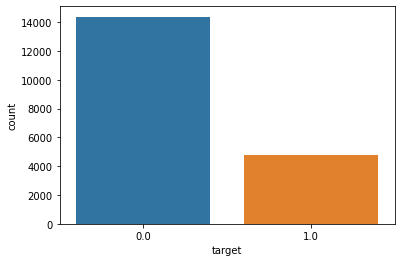

In [13]:
# Visualizamos variable objetivo.
sns.countplot(x=df['target']);
print(df.target.value_counts(normalize=True))


<a name="split_train_test"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 3. Detección de anomalías.

  Missings. Duplicados. Eliminación de features. Outliers

<img src="./img/ml_types.png" alt="drawing" width="650"/>


In [14]:
# Detección de los valores nulos por variables.

null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
9,company_type,6140,32.05
8,company_size,5938,30.99
2,gender,4508,23.53
6,major_discipline,2813,14.68
5,education_level,460,2.40
10,last_new_job,423,2.21
4,enrolled_university,386,2.01
7,experience,65,0.34
0,city,0,0.00
1,city_development_index,0,0.00


In [15]:
# Comprobamos si hay alguna fila duplicada y en su caso las eliminamos.
df.duplicated().sum()


49

In [16]:
df = df.drop_duplicates()
df.duplicated().sum()# comprobamos que se han eliminado correctamente todos los valores duplicados.


0

### OUTLIERS.

#### ¿Qué es un outlier?
Se trata de un valor atípico dentro de nuestros datos. Un valor que se desvía mucho de las métricas estadísticas de centralidad (media, moda, mediana). En el análisis exploratorio de datos suele ser algo a estudiar, el por qué tengo algunos valores atípicos en los datos. No obstante, en machine learning los outliers en los datos implican penalizaciones en los modelos, sobretodo los que trabajan con distancias y con Gradient Descent. Por tanto, hay que lidiar con ellos.

#### ¿Qué gráficas utilizo para visualizar los outliers?
Lo mejor son boxplots, histogramas, diagramas de densidad, scatter plots y count plots para categóricas.

#### ¿Qué técnicas hay para detectar outliers?
1. **Gráficamente**: Datos que se desvien mucho.
2. **Cuartiles**: se ve en un diagrama de caja. Datos que caigan fuera del rango +/- 1.5*IQR. Este 1.5 es muy restrictivo por lo que se suelen probar valores del 3 al 5. Dependerá mucho de cada feature.
3. **Desviación estándar**: todo lo que caiga fuera de (media +/- N*std) de la variable. Normalmente N es un valor de 3 a 5.

#### ¿Qué hago con los outliers?
Tenemos varias opciones:
1. **Eliminarlos**: es la técnica más habitual y sencilla
2. **No hacer nada**: si no son exagerados. Los árboles de decisión y SVM (en este orden) son robustos frente a outliers.
3. **Transformaciones logarítmicas**: elimina asimetría en las features, y por tanto reduce el efecto de los outliers. Para más info<a href="#feat_engi"> ver el apartado de transformaciones.</a>
4. **Binning**: discretiza la variable en varios grupos. Esto me va a permitir incluir los outliers en un grupo donde haya otros datos no considerados como outiers (ver ejemplo abajo)
5. **Imputación**: igual que con los missings, sustituir los valores. Esto tendrá sentido si los outliers están bien analizados, y desde el punto de vista de negocio conviene sustituirlos por un valor concreto.
6. **Tratamiento por separado**: si es un número significativo de outliers quizá merezca la pena separar los datos y tratarlos como otro modelo aparte.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


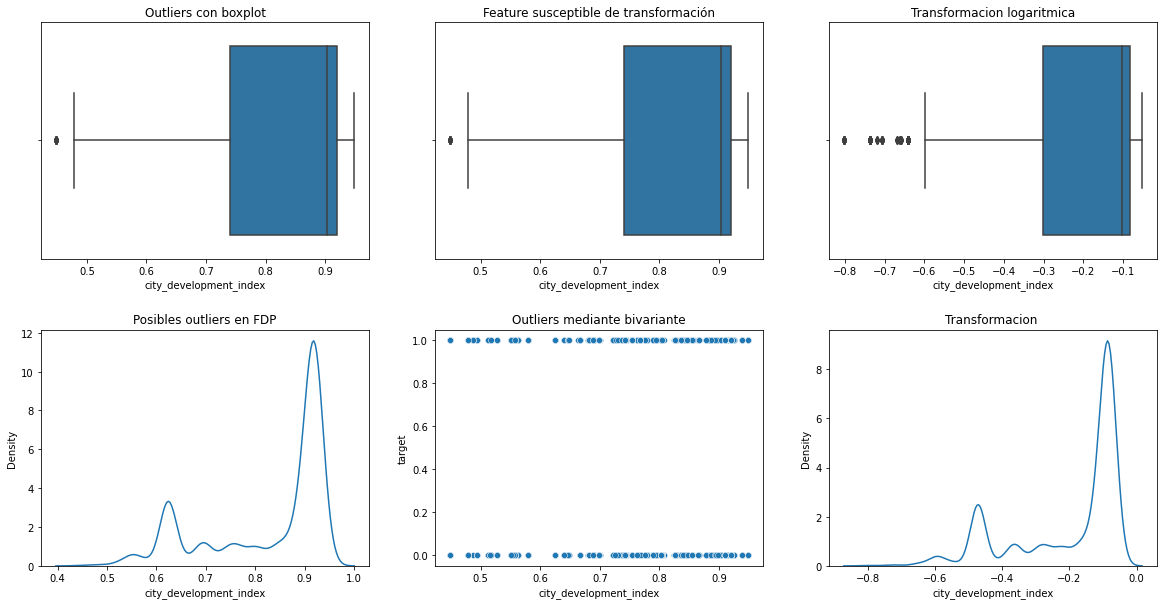

In [17]:
# Target Objetivo en el dataset 
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.3)

# Outliers con boxplot
sns.boxplot(df['city_development_index'], ax=axes[0, 0])
axes[0, 0].set_title("Outliers con boxplot")

# Feature susceptible de transformación
sns.boxplot(df['city_development_index'], ax=axes[0, 1])
axes[0, 1].set_title("Feature susceptible de transformación")

# Transformacion logaritmica
sns.boxplot(np.log(df['city_development_index']), ax=axes[0, 2])
axes[0, 2].set_title("Transformacion logaritmica")

# Posibles outliers mediante FDP
sns.kdeplot(df['city_development_index'], ax=axes[1, 0])
axes[1, 0].set_title("Posibles outliers en FDP")

# Outliers mediante bivariante
sns.scatterplot(data=df, x='city_development_index', y='target', ax=axes[1, 1])
axes[1, 1].set_title("Outliers mediante bivariante")

# Transformacion de FDP
sns.kdeplot(np.log(df["city_development_index"]), ax=axes[1, 2])
axes[1, 2].set_title("Transformacion ");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


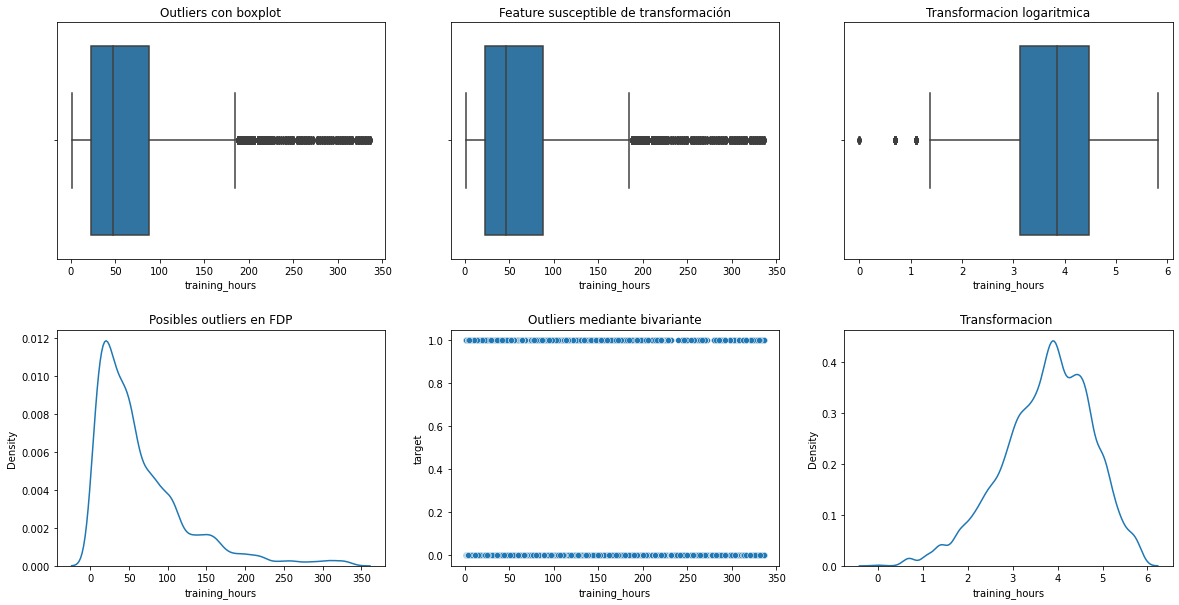

In [18]:
# Target Objetivo en el dataset 
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.3)

# Outliers con boxplot
sns.boxplot(df['training_hours'], ax=axes[0, 0])
axes[0, 0].set_title("Outliers con boxplot")

# Feature susceptible de transformación
sns.boxplot(df['training_hours'], ax=axes[0, 1])
axes[0, 1].set_title("Feature susceptible de transformación")

# Transformacion logaritmica
sns.boxplot(np.log(df['training_hours']), ax=axes[0, 2])
axes[0, 2].set_title("Transformacion logaritmica")

# Posibles outliers mediante FDP
sns.kdeplot(df['training_hours'], ax=axes[1, 0])
axes[1, 0].set_title("Posibles outliers en FDP")

# Outliers mediante bivariante
sns.scatterplot(data=df, x='training_hours', y='target', ax=axes[1, 1])
axes[1, 1].set_title("Outliers mediante bivariante")

# Transformacion de FDP
sns.kdeplot(np.log(df["training_hours"]), ax=axes[1, 2])
axes[1, 2].set_title("Transformacion ");

In [19]:
from collections import Counter

#drop the label 
outlier_list = ['city_development_index', 'training_hours'] 

def detect_outlier(df,feature):
    
    outlier_indices = []
    
    for f in feature:
        
        #lower quartile
        q1 = np.percentile(df[f],25)
        
        #upper quartile
        q3 = np.percentile(df[f],75)
        
        #interquartile range
        iqr = q3-q1
        
        #with coefficient
        with_coef = 1.5*iqr
        
        #detect outlier(s)
        lower_rule = q1-with_coef
        upper_rule = q3+with_coef
        
        outlier_variable = df[(df[f]<lower_rule) | (df[f]>upper_rule)].index
        outlier_indices.extend(outlier_variable)
    
    #converting to amount
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v>2)
    
    return multiple_outliers

 
#drop outliers
df = df.drop(detect_outlier(df,outlier_list),axis=0).reset_index(drop=True)


<a name="analisis"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 4. Análisis y limpieza de los datos 

  Estudio detallado variable por variable.

  Tratamiento de los missings.

  Análisis de las univariables y de las bivariables.


<img src="./img/ml_types.png" alt="drawing" width="650"/>


### City: código de ciudad.

In [20]:
df['city'].unique().tolist()# comprobamos los valores de esta variable.


['city_103',
 'city_40',
 'city_21',
 'city_115',
 'city_162',
 'city_176',
 'city_160',
 'city_46',
 'city_61',
 'city_114',
 'city_13',
 'city_159',
 'city_102',
 'city_67',
 'city_100',
 'city_16',
 'city_71',
 'city_104',
 'city_64',
 'city_101',
 'city_83',
 'city_105',
 'city_73',
 'city_75',
 'city_41',
 'city_11',
 'city_93',
 'city_90',
 'city_36',
 'city_20',
 'city_57',
 'city_152',
 'city_19',
 'city_65',
 'city_74',
 'city_173',
 'city_136',
 'city_98',
 'city_97',
 'city_50',
 'city_138',
 'city_82',
 'city_157',
 'city_89',
 'city_150',
 'city_70',
 'city_175',
 'city_94',
 'city_28',
 'city_59',
 'city_165',
 'city_145',
 'city_142',
 'city_26',
 'city_12',
 'city_37',
 'city_43',
 'city_116',
 'city_23',
 'city_99',
 'city_149',
 'city_10',
 'city_45',
 'city_80',
 'city_128',
 'city_158',
 'city_123',
 'city_7',
 'city_72',
 'city_106',
 'city_143',
 'city_78',
 'city_109',
 'city_24',
 'city_134',
 'city_48',
 'city_144',
 'city_91',
 'city_146',
 'city_133',
 'city_

In [21]:
len(df['city'].unique().tolist())# tenemos sede en 123 ciudades.


123

Como es una columna que tiene demasiados valores y no tiene  información relevante , la eliminamos. La siguiente columna esta relacionada con la demografía y nos aporta más valor.


In [22]:
df.drop(['city'], axis=1,inplace=True)


### City_development_index : índice de desarrollo de la ciudad (escalado).


In [23]:
df['city_development_index'].unique().tolist()# comprobamos los valores de esta variable.


[0.92,
 0.7759999999999999,
 0.624,
 0.789,
 0.767,
 0.764,
 0.762,
 0.913,
 0.926,
 0.8270000000000001,
 0.843,
 0.804,
 0.855,
 0.887,
 0.91,
 0.884,
 0.924,
 0.6659999999999999,
 0.5579999999999999,
 0.923,
 0.794,
 0.754,
 0.939,
 0.55,
 0.865,
 0.698,
 0.893,
 0.7959999999999999,
 0.866,
 0.682,
 0.802,
 0.579,
 0.878,
 0.897,
 0.949,
 0.925,
 0.8959999999999999,
 0.836,
 0.693,
 0.769,
 0.775,
 0.903,
 0.555,
 0.727,
 0.64,
 0.516,
 0.743,
 0.899,
 0.915,
 0.6890000000000001,
 0.895,
 0.89,
 0.847,
 0.527,
 0.7659999999999999,
 0.738,
 0.647,
 0.795,
 0.74,
 0.701,
 0.493,
 0.84,
 0.691,
 0.735,
 0.742,
 0.479,
 0.722,
 0.921,
 0.848,
 0.856,
 0.898,
 0.83,
 0.73,
 0.68,
 0.725,
 0.556,
 0.448,
 0.763,
 0.745,
 0.645,
 0.7879999999999999,
 0.78,
 0.512,
 0.7390000000000001,
 0.563,
 0.518,
 0.8240000000000001,
 0.487,
 0.649,
 0.7809999999999999,
 0.625,
 0.807,
 0.664]

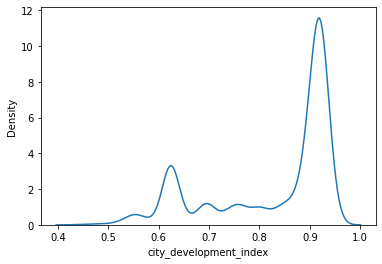

In [24]:
# Comprobamos que el mayor numero de poblaciones tienes alrededor de un 90% de indice de desarrollo.
# Los indices de desarrollo van del 50% al 93 %. Alrededor del 60% también hay un repunte.
sns.kdeplot(data=df, x="city_development_index")


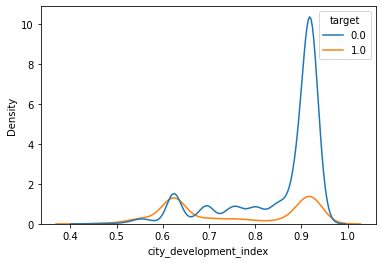

In [25]:
# Aquí podemos ver que las personas que viven en ciudades desarrolladas tienen una menor probabilidad de cambiar de trabajo.
sns.kdeplot(data=df, x="city_development_index", hue="target")


En el siguiente gráfico podemos ver que más personas de ciudades con un índice de desarrollo bajo están buscando un cambio de trabajo porque  están menos satisfechas con su trabajo actual o con el lugar en el que viven.


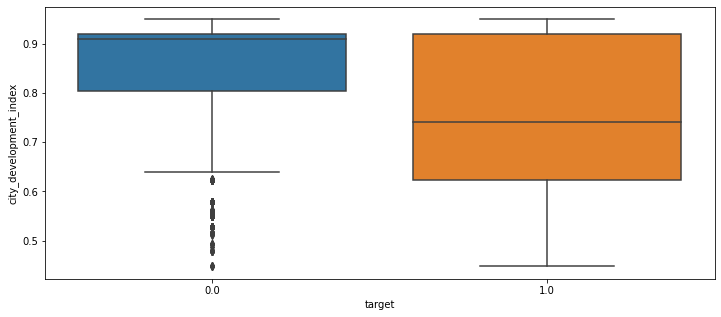

In [26]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='target',y='city_development_index',data=df)
xlabel='Looking for job'
ylabel = 'city_development_index'

### Gender.


In [27]:
# Trabajamos con los valores nulos de esta columna.
df['gender'].value_counts()

Male      13173
Female     1237
Other       191
Name: gender, dtype: int64

Text(0, 0.5, 'Número')

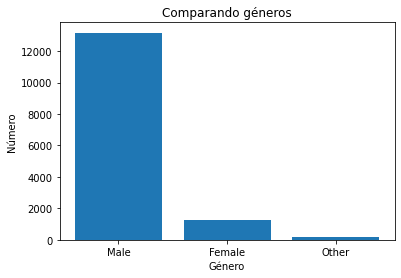

In [28]:
# VISUALIZAMOS LA COLUMNA GENERO.
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = df['gender'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 

# set title and labels 
ax.set_title('Comparando géneros') 
ax.set_xlabel('Género') 
ax.set_ylabel('Número')


In [29]:
df['gender'].isna().sum()# Trabajamos con los valores nulos de esta columna.


4508

In [30]:
# Rellenamos los valores Nan de la columna gender con valores aleatorios masculinos, femeninos a la vez.

from random import choice

mask = df["gender"].isna()

df.loc[mask,["gender"]] = df.loc[mask,["gender"]].applymap(lambda _: choice(["Male","Female"]))

In [31]:
# como vemos nos quedan todavia algunos valores "Other".
df['gender'].value_counts()

Male      15405
Female     3513
Other       191
Name: gender, dtype: int64

In [32]:
df['gender'].isna().sum()

0

In [33]:
# los valores de sexo "Other", son reemplazados por el valor minoritario , para desbalancear un poco.
df['gender'].replace({"Other": "Female"}, inplace=True)


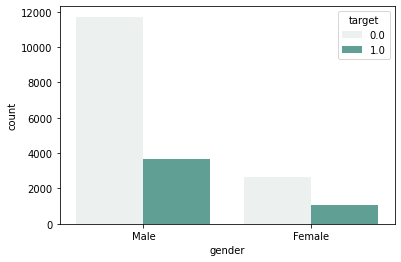

In [34]:
# Visualizamos la columna genero:  target: 0 – Not looking for job change, 1 – Looking for a job change.
# la mayoria de hombre, No buscan un nuevo trabajo. 
# Pero vemos la diferencia abimasl que hay entre hombres y mujeres que buscan un nuevo trabajo. La diferencia entre los que se quedan en la empresa y los que buscan un nuevo trabajo, para los hombres es abismal. Mientras que esta diferencia entre mujeres es mas sutil.

sns.countplot(x=df.gender, hue=df.target, palette='light:#5A9')

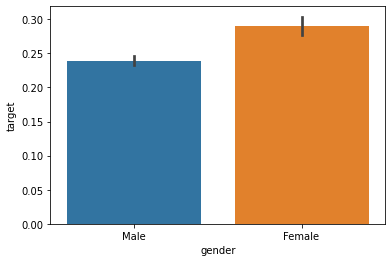

In [35]:
sns.barplot(x="gender", y="target", data=df)
plt.show()
# Mayor porcentaje de mujeres estan buscando un nuevo trabajo-

In [36]:
# Binarizamos male y female feature.
df['Sex_bin'] = df['gender']
df = df.replace({'Sex_bin': {'Male': 0, 'Female': 1}})
df.head(4)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Sex_bin
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0
2,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,1
3,0.789,Female,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1


In [37]:
# Eliminamos la columna NO Binarizada.
df.drop(['gender'], axis=1,inplace=True)


### Relevent_experience: experiencia relevante del candidato.


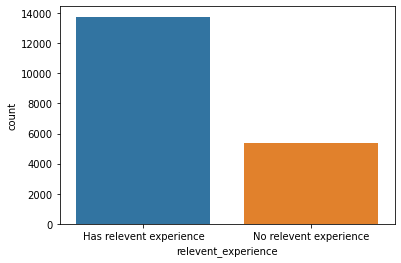

In [38]:
sns.countplot(x=df.relevent_experience)
# podemos comprobar que la gran mayoria de los candidatos poseen experiencia relevante.

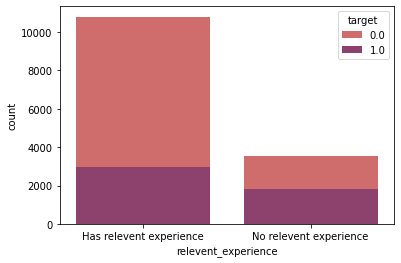

In [39]:
# la mayoria de personas que tiene experiencia , NO  buscan un trabajo nuevo.
sns.countplot(x=df.relevent_experience, hue=df.target, palette='flare', dodge=False) # dodge me permite apilar

In [40]:
pd.crosstab(df['relevent_experience'], df['Sex_bin'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)
# tenemos las columnas en tanto por ciento.
# Podemos ver que en 75 % de los hombres tiene experiencia relevante frente a un 25%.
# y la diferencia para las mujeres es menor, un 20% menos. La diferencia de la experiencia relevante  entre las mujeres esta mas homogeneizada.


Sex_bin,0,1
relevent_experience,,
Has relevent experience,73.580006,65.172786
No relevent experience,26.419994,34.827214


In [41]:
# Binarizamos Relevent_ experience
df['relev_exp_bin'] = df['relevent_experience']
df = df.replace({'relev_exp_bin': {'Has relevent experience': 1, 'No relevent experience': 0}})


In [42]:
#Eliminamos la columna ya binarizada.
df.drop(['relevent_experience'], axis=1,inplace=True)


### Education Level: nivel de educación del candidato.


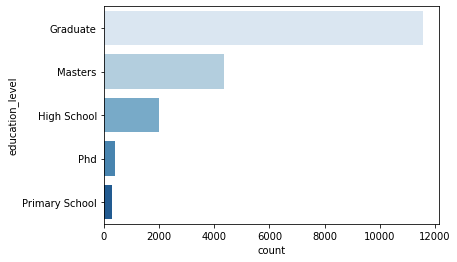

In [43]:
sns.countplot(y= df['education_level'], palette="Blues") 
# Comprobamos que el mayor número de trabajadores poseen un Grado Universitario.

In [44]:
# en esta variable teniamos algunos valores nulos.
df['education_level'].isna().sum()


460

In [45]:
# Rellenamos los valores nulos de esta variable con el valor intermedio, para seguir manteniendo las proporciones.
df['education_level'].fillna('High School', inplace=True)

In [46]:
df['education_level'].isna().sum()


0

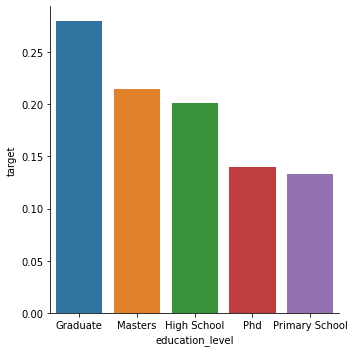

In [47]:
# Comparamos esta variable con la variable objetivo.
sns.catplot(x="education_level", y="target", data=df, kind="bar", ci=None)
# Comprobamos que el mayor numero de personas buscando un nuevo empleo son Graduadas.

In [48]:
# lo convertimos a una variable numérica.
df = df.replace({'education_level': {'Primary School': 0, 'High School': 1,'Graduate': 2,'Masters': 3,'Phd': 4}})

### Enrolled_university: tipo de curso universitario inscrito, si lo hubiera.


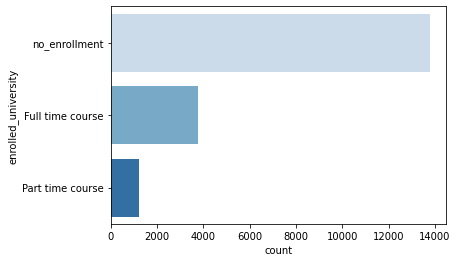

In [49]:
sns.countplot(y= df['enrolled_university'], palette="Blues")
 # Comprobamos esta variable.

No le encuentro sentido a esta variable, ya que el mayor numero de empleados era graduados y aqui aparece  como no apuntandos a la universidad, asi que elimino esta columna.


In [50]:
df.drop(['enrolled_university'],axis=1,inplace=True) 


### Major discipline: disciplina principal de educación del candidato.


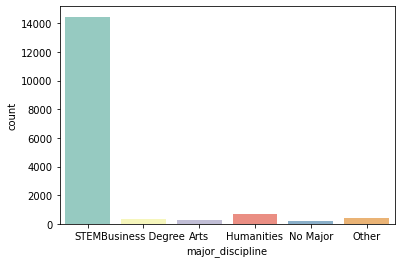

In [51]:
sns.countplot(x=df.major_discipline, palette="Set3")# visualizamos la variable.

In [52]:
# Mayor discipline_ STEM; SCIENCE.
# comparamos esta variable con la variable objetivo
pd.crosstab(index=df["major_discipline"],
                        columns=df["target"], margins=True)


target,0.0,1.0,All
major_discipline,,,
Arts,200,53,253
Business Degree,241,86,327
Humanities,528,141,669
No Major,168,55,223
Other,279,102,381
STEM,10667,3780,14447
All,12083,4217,16300


In [53]:
pd.crosstab(df['major_discipline'], df['target'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)
# tenemos la comparacion relativa en tanto por ciento


target,0.0,1.0
major_discipline,,
Arts,1.655218,1.256818
Business Degree,1.994538,2.039364
Humanities,4.369776,3.343609
No Major,1.390383,1.304245
Other,2.309029,2.418781
STEM,88.281056,89.637183


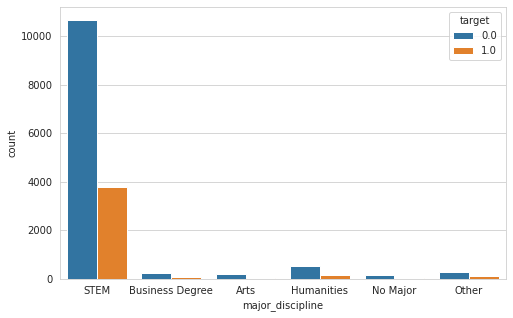

In [54]:
# Mayor discipline_ Visualizamos comparando esta variable con el objetivo.
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'major_discipline',hue='target',data=df)

In [55]:
# esta variable la elimino ya que  el ratio con respecto a la variable objetivo no me aporta mucho valor al modelo.
df.drop(['major_discipline'], axis=1,inplace=True)


### Experience: Experiencia total del candidato en años.


In [56]:
df['experience'].isna().sum()

65

In [57]:
# rellenamos los valores nulos de esta variable.
df['experience'].fillna("0", inplace=True)

In [58]:
df['experience'].isna().sum()

0

In [59]:
# reemplazamos los valores de la columna experience >20 por 21, ya que al convertirlo en numericos da error.
df["experience"].replace({">20": "21","<1":"0"}, inplace=True)

In [60]:
# Convertimos la columna de 'experience' en valores númericos.
df["experience"] = pd.to_numeric(df["experience"])

In [61]:
df["experience"].dtypes

dtype('int64')

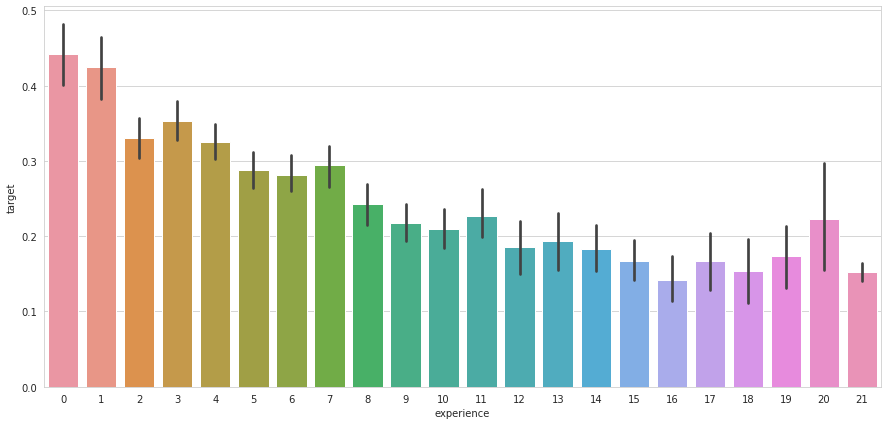

In [62]:
# Comparamos esta variable con la variable objetivo. Observamos una tendecia descendiente.
# A mas años de experiencia, menos probabilidad de buscar un nuevo trabajo.
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="experience", y="target", data=df)

In [63]:
# Realizamos la discretización del atributo Experience con pd.cut y bins / labels a medida
bins = [0, 5, 10, 15, 20, np.inf]
labels = ['0-5', '5-10', '10-15', '15-20', '+20']
for score in df:
    df['años_experiencia'] = pd.cut(df["experience"], bins=bins, labels=labels)

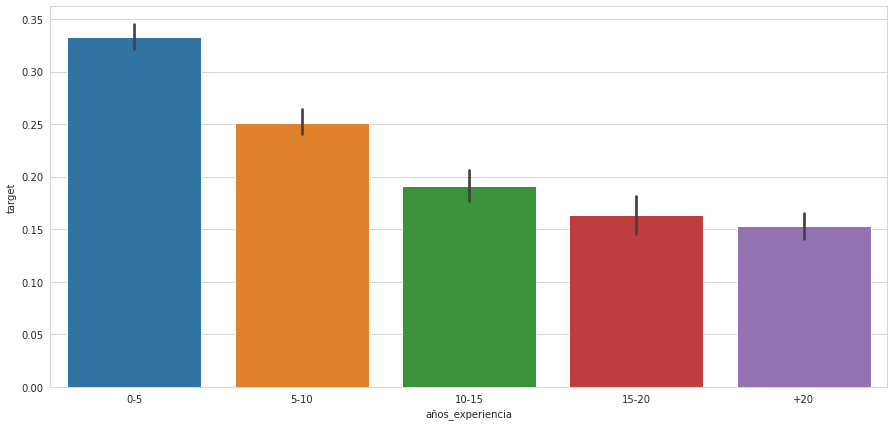

In [64]:
# Comparamos esta variable con la variable objetivo, y observamos la tendencia.
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="años_experiencia", y="target", data=df)

In [65]:
# Eliminamos columnas ya discretizadas,  para no  repetirlas.
df.drop(['experience'], axis=1,inplace=True)


In [66]:
df['años_experiencia'].isna().sum()

586

In [67]:
df.groupby(['años_experiencia']).count()

,city_development_index,education_level,company_size,company_type,last_new_job,training_hours,target,Sex_bin,relev_exp_bin
años_experiencia,,,,,,,,,
0-5,5856,5856,3387,3357,5642,5856,5856,5856,5856
5-10,5007,5007,3700,3619,4935,5007,5007,5007,5007
10-15,2826,2826,2254,2199,2804,2826,2826,2826,2826
15-20,1581,1581,1228,1208,1561,1581,1581,1581,1581
+20,3253,3253,2347,2344,3220,3253,3253,3253,3253


In [68]:
# convertimos a una variable numérica.
df = df.replace({'años_experiencia': {'0-5': 2.5, '5-10': 7.5, '10-15': 12.5, '15-20': 17.5, '+20': 22.5}})


### company_size: Número de empleados en la empresa del empleador actual.

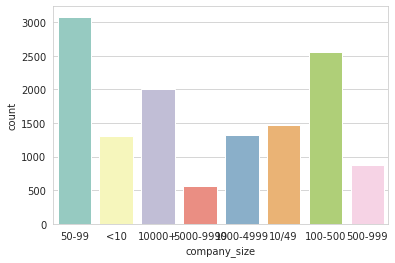

In [69]:
sns.countplot(x=df.company_size, palette="Set3")
# Visualizamos los datos de esta variable.

In [70]:
# Missing values.
df['company_size'].isna().sum()

5920

In [71]:
# Rellenamos los valores NAN de esta columna copiando los valores de la celda anterior y posterior.
df['company_size'].fillna(method='ffill', limit=1, inplace=True)
df['company_size'].fillna(method='bfill', limit=1, inplace=True)

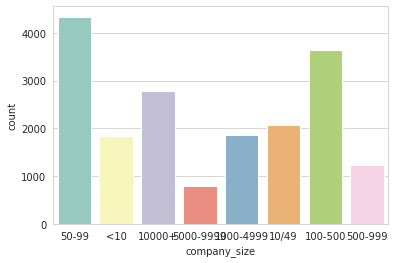

In [72]:
sns.countplot(x=df.company_size, palette="Set3")
# Visualizamos los datos despues de la limpieza.

In [73]:
# Missing values.
df['company_size'].isna().sum()

537

In [74]:
pd.crosstab(df['company_size'], df['target'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)
# Comparamos esta variable con la variable objetivo
# Tenemos la comparación en tanto por ciento


target,0.0,1.0
company_size,,
10/49,10.446486,13.579157
100-500,19.774977,18.944579
1000-4999,10.396639,8.920291
10000+,15.089368,14.903952
50-99,23.314107,23.537205
500-999,6.736452,6.270700
5000-9999,4.165777,4.438066
<10,10.076195,9.406050


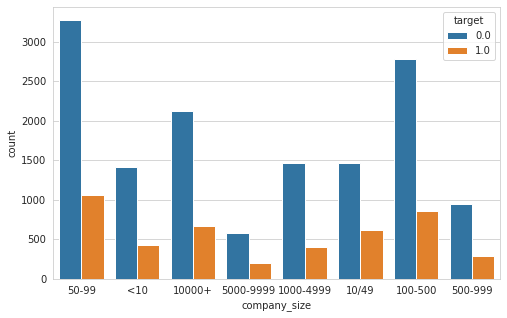

In [75]:
# Visualizamos esta comparación.
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_size',hue='target',data=df)

Discretizamos esta variable para reducir valores en :grande , mediana y pequeña empresa.

In [76]:
# reemplazo los valores de esta variable, en vez de por intervalo por 
df['company_size'] = df.company_size.replace({'50-99':"Mediana",
"<10":"Pequeña",
"10000+":"Gran_empresa",
"5000-9999": "Gran_empresa",
"1000-4999":"Gran_empresa",
"10/49":"Pequeña",
"100-500":"Mediana",
"500-999":"Gran_empresa"})


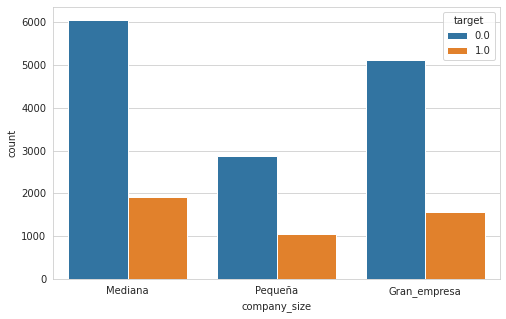

In [77]:
#Comprobamos que el mayor numero de persona que buscan o no trabajo, se encuentran en la mediana empresa.
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_size',hue='target',data=df)

In [78]:
# Reemplazamos valores nulos con la variable minoritaria para desbalancear.
df['company_size'] = df.company_size.fillna("Pequeña")


In [79]:
# Missing values.
df['company_size'].isna().sum()

0

In [80]:
# convertimos a una variable numérica
df = df.replace({'company_size': {'Pequeña': 0, 'Mediana': 1,'Gran_empresa': 2}})

### Company Type: tipo de empleador actual.

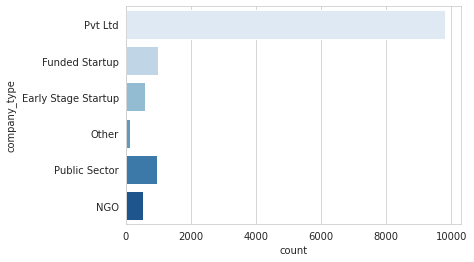

In [81]:
# Visualizamos los datos.
sns.countplot(y= df['company_type'], palette="Blues") # invertimos el eje
# Sociedad de responsabilidad limitada (Private limited company)


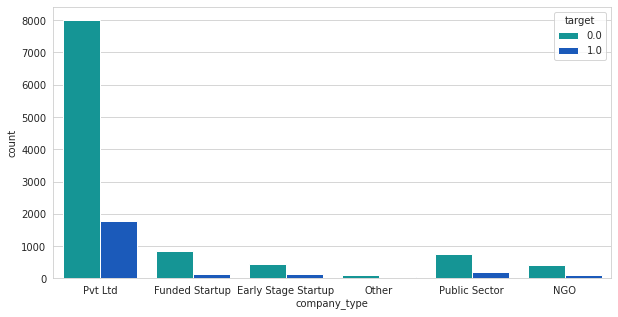

In [82]:
# comparamos con la variable.
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_type',hue='target',data=df,palette='winter_r')

In [83]:
# esta variable tiene mas de un 30% de valores nulos.
df['company_type'].isna().sum()# Trabajamos con los valores nulos de esta columna.


6122

In [84]:
df['company_type'].isnull().sum()/len(df)*100 # observamos por valor relativo

32.03725992987597

In [85]:
# asi que eliminamos esta variable.
df.drop(['company_type'], axis=1,inplace=True)


### Last new job: diferencia en años entre el trabajo anterior y el trabajo actual,es decir, cuantos años lleva en esta empresa.


In [86]:
# Missing values
df['last_new_job'].fillna('never', inplace=True)

In [87]:
# reemplazamos los valores de la columna experience >20 por 21, ya que al convertirlo en numericos da error.
df["last_new_job"].replace({">4": "5","never":"0"}, inplace=True)

In [88]:
# Convertimos la columna de 'experience' en valores númericos.
df["last_new_job"] = pd.to_numeric(df["last_new_job"])

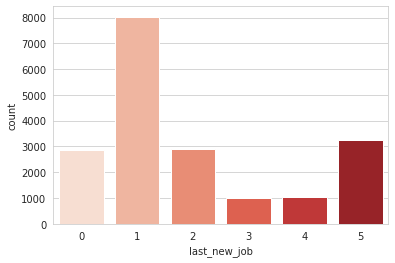

In [89]:
sns.countplot(x=df.last_new_job, palette="Reds")
# comprobamos que el mayor numero de candidatos, tenian un año de experiencia en su puesto de trabajo anterior.

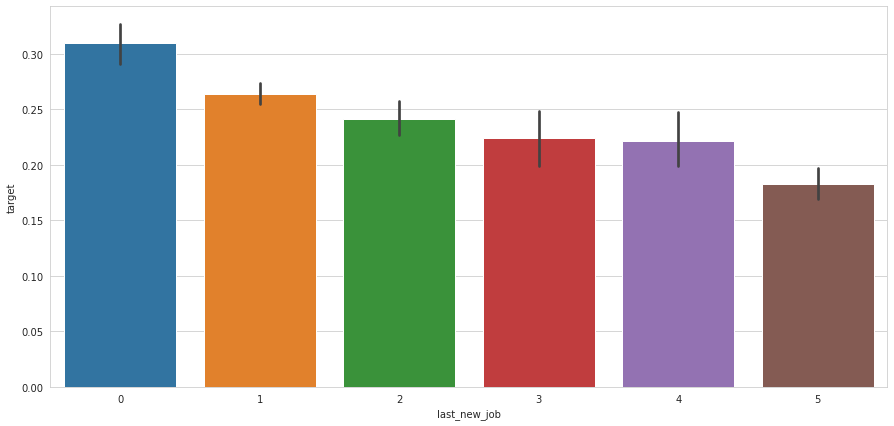

In [90]:
plt.figure(figsize= [15.0, 7.0])# en esta gráfica podemos observar como el porcentaje de personas que buscan un nuevo empleo se va reduciendo conforme tiene mas años en su puesto de trabajo.
sns.barplot(x="last_new_job", y="target", data=df)

### Training hours: horas de formación completadas.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


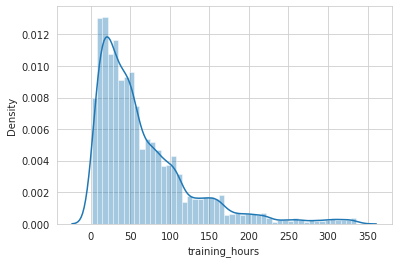

In [91]:
sns.distplot(df.training_hours);
# Visualizamos esta variable , podemos comprobar que el mayor numero de formación , se encuentra entre 0 y 50 horas completadas.

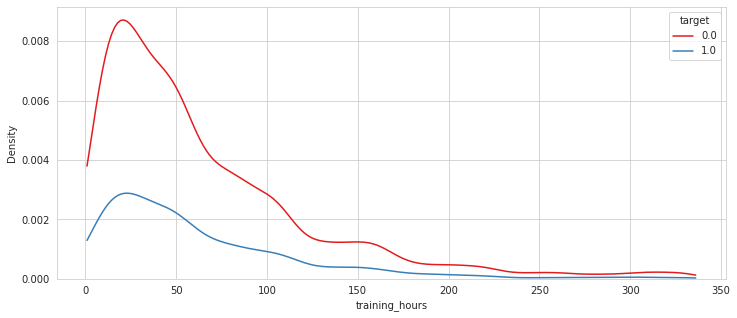

In [92]:
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')
sns.kdeplot(data=df, x="training_hours", hue="target",cut = 0,palette='Set1')
# Aquí podemos ver que solo a unos pocos empleados se les ha ofrecido una capacitación de más de 100 horas.


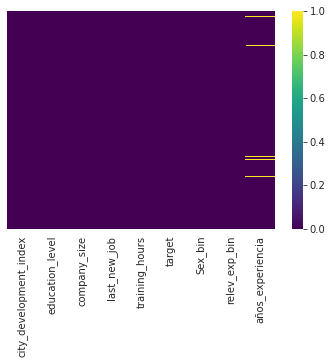

In [93]:
# COMPROBAMOS QUE NO QUEDAN VALORES NULOS.
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [94]:
# Eliminamos los pocos valores nulos que nos quedan.
df.dropna(inplace=True)


<a name="ML"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a> 
# 5. PCA </a></dt>
  
<img src="./img/ml_types.png" alt="drawing" width="650"/>


In [95]:
data=df.copy()

In [96]:
df2=df.copy()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18523 entries, 0 to 19108
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18523 non-null  float64
 1   education_level         18523 non-null  int64  
 2   company_size            18523 non-null  int64  
 3   last_new_job            18523 non-null  int64  
 4   training_hours          18523 non-null  int64  
 5   target                  18523 non-null  float64
 6   Sex_bin                 18523 non-null  int64  
 7   relev_exp_bin           18523 non-null  int64  
 8   años_experiencia        18523 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 1.4 MB


In [98]:
df.head(5)

,city_development_index,education_level,company_size,last_new_job,training_hours,target,Sex_bin,relev_exp_bin,años_experiencia
0,0.920,2,1,1,36,1.0,0,1,22.5
1,0.776,2,1,5,47,0.0,0,0,12.5
2,0.624,2,1,0,83,0.0,1,0,2.5
4,0.767,3,1,4,8,0.0,0,1,22.5
5,0.764,2,1,1,24,1.0,1,1,12.5


In [99]:
target_data=df['target']

In [100]:
target=["Jobseeker","Empleado"]

In [101]:
df=df[["city_development_index","education_level", "company_size","last_new_job","training_hours","Sex_bin","relev_exp_bin","años_experiencia"]]

In [102]:
# se inicializa la variable PCA y se le asignan solo dos componentes: el de mayor varianza y el otrogonal
pca=PCA(n_components=2)

In [103]:
#luego se entrena la variable PCA con los datos
pca.fit(df)

PCA(n_components=2)

In [104]:
# se reduce las dimensiones a 2 dimensiones
transformada=pca.transform(df)

In [105]:
# se visualiza los datos sin procesar( cantidad de datos, caracteristicas- columnas)
print(df.shape)

(18523, 8)


In [106]:
# se visualiza los datos procesada ( cantidad de datos, caracteristicas - columnas)
print(transformada.shape)

(18523, 2)


Text(0, 0.5, 'PCA2')

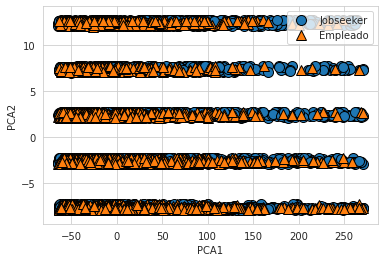

In [107]:
#se entrena el algoritmo con los datos y se grafica
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], target_data)
plt.legend(target, loc='best')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

In [108]:
X=df[["city_development_index","education_level", "company_size","last_new_job","training_hours","Sex_bin","relev_exp_bin","años_experiencia"]]

In [109]:
# Normalizar
#X_Std=StandardScaler().fit_transform(X)

In [110]:
# toda la data se pone en una escala entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
escala=MinMaxScaler()

In [111]:
escala.fit(df)

MinMaxScaler()

In [112]:
escalada=escala.transform(df)
pca.fit(escalada)

PCA(n_components=2)

In [113]:
transformada=pca.transform(escalada)

Text(0, 0.5, 'PCA2')

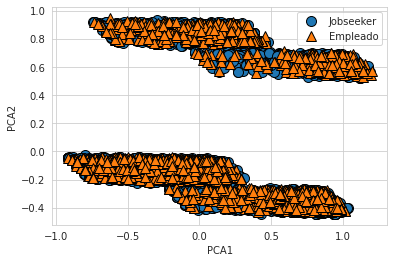

In [114]:
#se entrena el algoritmo con los datos y se grafica
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], target_data)
plt.legend(target, loc='best')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

### Daniel

In [115]:
X=df[["city_development_index","education_level", "company_size","last_new_job","training_hours","Sex_bin","relev_exp_bin","años_experiencia"]]

In [116]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,max_iter=300,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

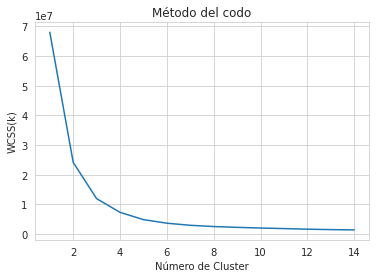

In [117]:
plt.plot(range(1,15),wcss)
plt.title("Método del codo")
plt.xlabel("Número de Cluster")
plt.ylabel("WCSS(k)")
plt.show()

In [118]:
kmeans=KMeans(n_clusters=5,max_iter=300,random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [119]:
set(y_kmeans)

{0, 1, 2, 3, 4}

Text(0, 0.5, 'Numeros de personas')

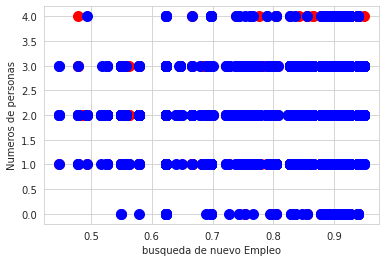

In [120]:
X=df.iloc[:].values
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c="red",label="JobSeeker")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c="blue",label="Empleados")
#plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c="green",label="Objetivo")
#plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c="cyan",label="Descuidados")
#plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c="magenta",label="Conservadores")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="Baricentro")
plt.xlabel("busqueda de nuevo Empleo")
plt.ylabel("Numeros de personas")
#plt.legend()

Otro intento

In [121]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data)
X_scalado=scaler.transform(data)

In [122]:
from sklearn.decomposition import PCA

In [123]:
pca=PCA(n_components=2)

In [124]:
pca.fit(X_scalado)

PCA(n_components=2)

In [125]:
x_pca=pca.transform(X_scalado)

In [126]:
x_pca.shape

(18523, 2)

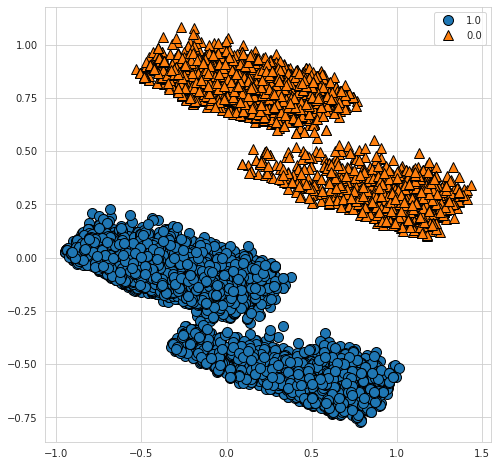

In [127]:
plt.figure(figsize=(8,8))
#plt.scatter(X_train_escalado[:,0],X_train_escalado[:,1],label="Train",s=60,c="red")
mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1],data.target)
plt.legend(data.target,loc="best")

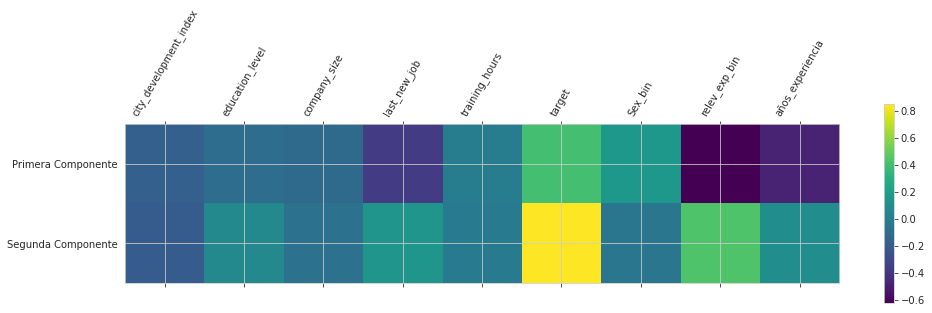

In [128]:
plt.matshow(pca.components_,cmap="viridis")
plt.yticks([0,1],["Primera Componente","Segunda Componente"])
plt.colorbar()
plt.xticks(range(len(data.columns)),data.columns,rotation=60);

# ANÁLISIS DEL COMPONENTE PRINCIPAL (pca)


**PCA** es una herramienta para reducir la dimensionalidad en los datos.

Se puede utilizar para convertir un conjunto bastante grande de variables, en un conjunto más pequeño con la mayor cantidad de información del conjunto original.

Es un procedimiento matemático que transforma un conjunto de variables correlacionada en un conjunto ( más pequeño) de variables no correlacionadas llamadas componentes principales.

El **primer componente principal** representa la mayor cantidad posible de variabilidad en los datos y cada componente subsiguiente explica la mayor parte de la variabilidad restante, es decir, que el nuevo conjunto de datos de menor dimensión, deberá preservar la varianza de los datos originales.

In [129]:
 # Importamos el conjunto de datos.
 X=df2.drop(['target'],axis=1)
 y=df2['target']

* Las intancias forman una elipse que se aprecia desde el origen hacia la parte superior derecha de la gráfica.
* Para reducir la dimensión debemos proyectar lo puntos de línea.
* En cada una de ellas la varianza es distinta , por lo que la tarea es ver en cual de las dos líneas las instancias tienen la mayor variación.





1.   Las instancias tienen la mayor variación sobre la línea de guiones , más que sobre la línea de guiones, más que sobre la línea punteada.

2.   De hecho, la línea en guiones es el primer componente principal.

3. El segundo componente principal debe ser ortogonal al primero, esto es , que el segundo componente principal debe ser estadísticamente independiente , y al parecer será perpendicular al primer componente principal.



**CONCEPTOS BÁSICOS**

* VARIANZA: es la medida que nos indica que tan disperso o distribuido se encuentra un conjunto de valores. La varianza se calcula como el promedio del cuadrado de la diferencia de valores con respecto a la media de ese conjunto de valores:
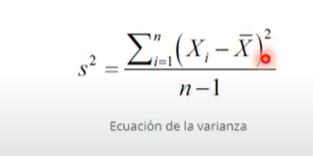

* COVARIANZA: es la medida de que tanto dos variables cambian juntas. Es una medida de fuerza de la correlación entre dos conjunto de variables. SI la covarianza entre dos variables es cero, las variables no están correlacionadas. Sin embargo, el que dos variables no estén correlacionadas, no implica que sean independientes, dado que la correlación es sólo una medida de dependencia lineal  se calcula con la siguiente ecuación: 

Si la covarianza no es cero, el signo indica si las variables están positiva o negativamente correlacionadas. Si dos variables están positivamente correlacionadas, significa que una incrementa su valor cuando la otra lo incrementa.

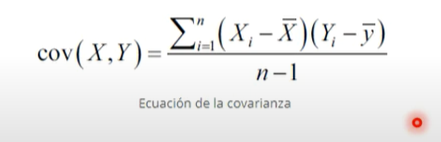

Cuando dos variables están negativamente corerlacionadas significa que una variable tiene un decremento relativo a su media cuando la otra variable presenta un incremento relativo a su media.

La **matriz de covarianza** describe los valores de la covarianza entre cada par de valores del conjunto de datos. El elemento *(i,j)* indica la covarianza de la dimensión *i, j* de los datos. 

**Vectores Propios y Valores Propios**
Un vector se describe por su dirección y su magnitud, o longitud. Un vector propio de una matriz es un vector no cero que satisface la siguiente ecuación:

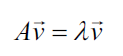

En la ecuación anterior v es el vector propio A es una matriz cuadrada y lanbda es una escalar llamado valor propio. La dirección del vector propio se mantiene igual después de ser transformado por A, sólo cambia su magnitud, dada por el valor propio, es decir que al multiplicar una matriz por uno de sus vector propios es equivalente a escalar el vector propio. 

En inglés un vector propio se conoce como eigenvector y la palabra eigen en Alemán significa pertenece a, o que es peculiar a, por lo que el vector propio de una matriz es un vector que pertenece a, y caracteriza la estructura de los datos.

Tanto los vectores propios como los valores propios sólo pueden ser derivados de matrices cuadradas y no todas las matrices cuadradas tienen vectores propios o valores propios. Si una matriz tiene vectores y valores propios, tendrá un par por cada una de sus dimensiones. Los componentes principales de una matriz  son los vectores propios de su matriz de covarianzas, ordenados por sus correspondientes valores propios.

El vector propio con el valor propio más grande es el primer componente principal, el segundo componente principal es el vector propio con el segundo valor propio más grande y así sucesivamente. 

In [134]:
# dividimos los datos en el conjunto de entrenamiento y el conjunto de pruebas.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [136]:
# estandarizamos escalas para las variables independientes
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [138]:
# Aplicando PCA
# Utilizando PCA (Principal Component Analysis) para reducir el siguiente conjunto de datos a solo dos variables.
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

In [149]:
# Lo mismo sucedió con el conjunto de pruebas X_test.
# Ahora para saber que tanto se expresa la varianza de los dos componentes principales resultantes, con relación a la dimensión original
# es decir, a los datos de las variables originales, podemos extraer esa información del objeto PCA y analizarla.

# Explicación de la varianza
# Creamos un vector con el porcentaje de influencia de la varianza 
# para las dos variables resultantes del conjunto de datos
explained_variance = pca.explained_variance_ratio_
print( explained_variance)

[0.24834942 0.13552609]


Los dos componentes principales resultantes son los dos valores propios de los vectores propios con el valor más alto de los 13 originales del conjunto de datos. De ahí se obtuvieron los dos más altos para obtener las dos dimensiones resultantes o componentes principales. El primero representa el 24.8%  y el segundo el 13.5%

Para comprobar que las dos variables resultantes representan a las variables originales vamos a hacer la predicción de la variable dependiente con la regresión logística, comprobando los resultados de predicción con la matriz de confusión:

In [140]:
# Aplicando Regressión Logística.
clasificador=LogisticRegression(random_state=0)

In [141]:
clasificador.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [142]:
# ahora vamos a predecir
y_pred=clasificador.predict(X_test)

In [145]:
# visualizamos si la predicción a funcionado con la matriz de confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2741   78]
 [ 809   77]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


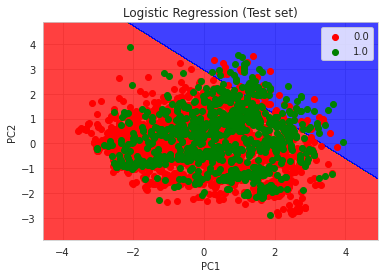

In [147]:
# visualizamos los valores de prueba
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## DashBoard


In [150]:
import glob # "cotillear" carpetas
import plotly.express as px
import plotly.graph_objects as go
### Librerías para el dash
import dash ## Inicia sesion
import dash_core_components as dcc # Permite crear componentes interactivos
import dash_html_components as html # Permite acceder a HTML
import dash_table
from dash.dependencies import Output, Input

In [151]:
app=dash.Dash(__name__)

In [154]:
df2.head(3)

,city_development_index,education_level,company_size,last_new_job,training_hours,target,Sex_bin,relev_exp_bin,años_experiencia
0,0.920,2,1,1,36,1.0,0,1,22.5
1,0.776,2,1,5,47,0.0,0,0,12.5
2,0.624,2,1,0,83,0.0,1,0,2.5


In [158]:
app.layout = html.Div(
    children=[
        html.H1(children="People Analytics",),
        html.P(
            children="Analyze the behavior of people who is looking for a new job."
            ,
        ),
        dcc.Graph(
            figure={
                "df2": [
                    {
                        "x": data["city_development_index"],
                        "y": data["target"],
                        "type": "lines",
                    },
                ],
                "layout": {"title": "Average Jobseeker by cities"},
            },
        ),
        dcc.Graph(
            figure={
                "df2": [
                    {
                        "x": data["años_experiencia"],
                        "y": data["target"],
                        "type": "lines",
                    },
                ],
                "layout": {"title": "average jobseeker by experience"},
            },
        ),
    ]
)

In [159]:
if __name__=="__main__":
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
